 # ***NAME: PURV PATEL***




## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Dataset

### Importing Dataset

In [ ]:
data=pd.read_csv("SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Checking if there is any null dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Visualization

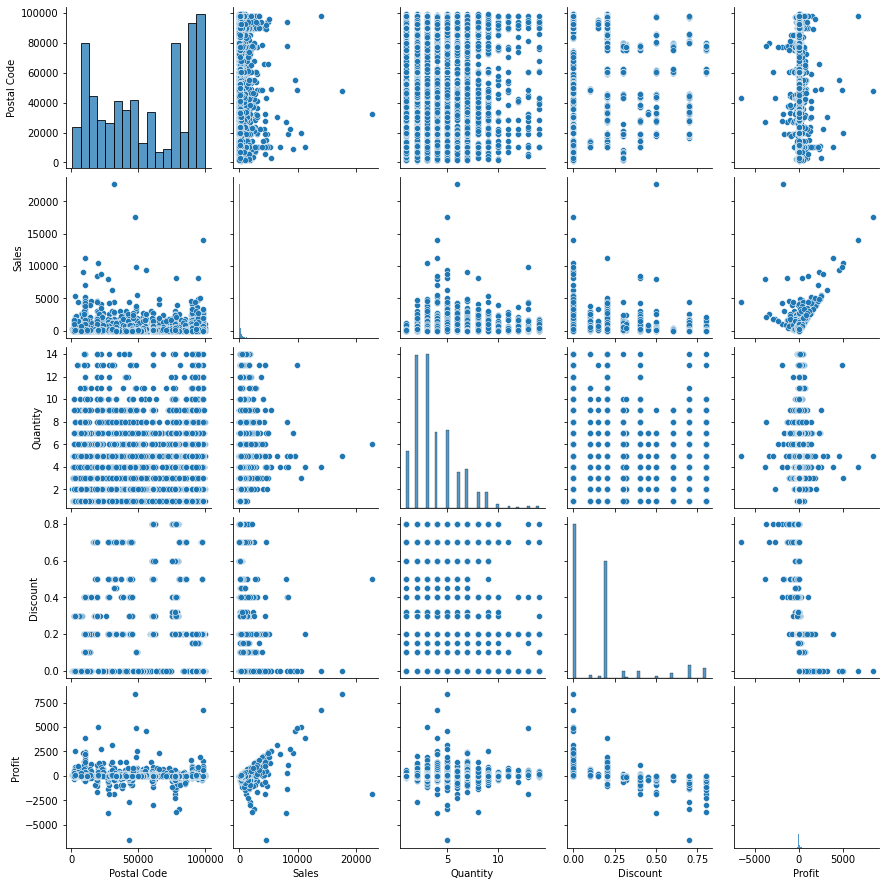

In [ ]:
sns.pairplot(data)

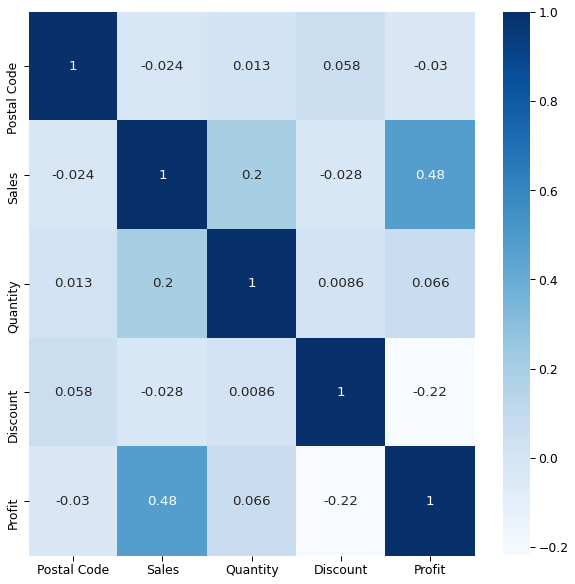

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('paper', font_scale=1.4)
sales_mx=data.corr()
sns.heatmap(sales_mx,annot=True,cmap='Blues')

## Data Analysis

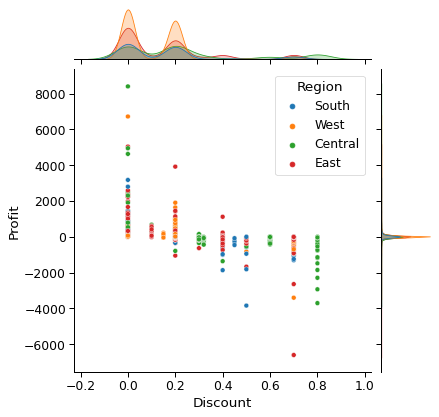

In [ ]:
sns.jointplot(x='Discount',y='Profit',data=data,hue='Region')

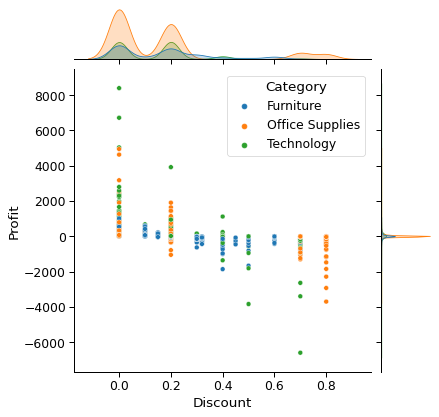

In [ ]:
sns.jointplot(x='Discount',y='Profit',data=data,hue='Category')

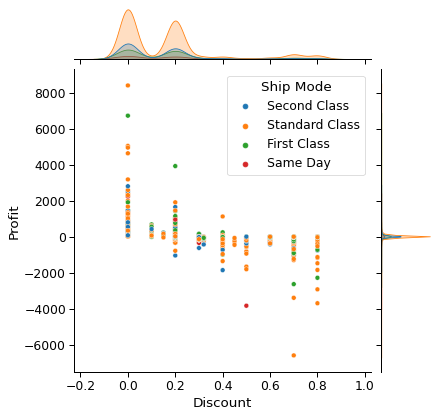

In [ ]:
sns.jointplot(x='Discount',y='Profit',data=data,hue='Ship Mode')

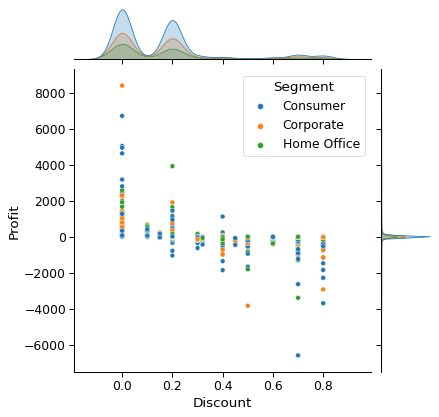

In [ ]:
sns.jointplot(x='Discount',y='Profit',data=data,hue='Segment')

High discounts brings down the profit steeply. So one measure is to reduce the discount to a reasonable amount especially in central regions. Also lowering discounts on Office Supplies may help.

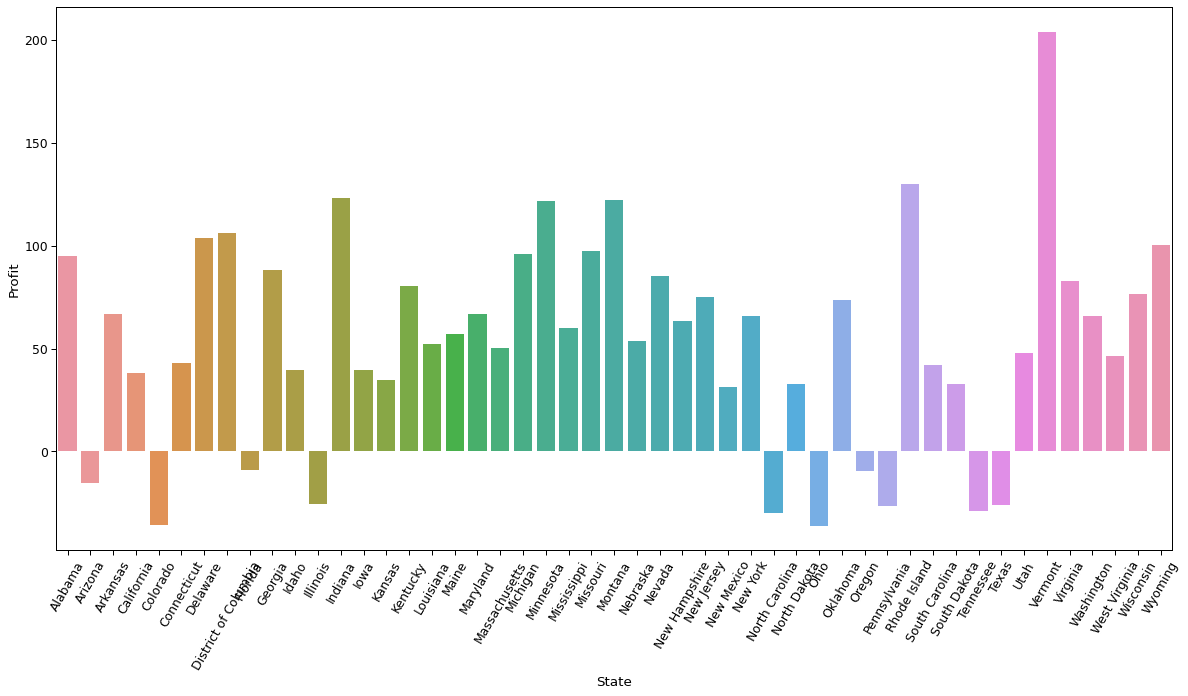

In [ ]:
f= pd.DataFrame(data.groupby(['State']).Profit.mean())
f.reset_index(inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(x='State',y='Profit',data=f)
plt.xticks(rotation=60)
plt.show()

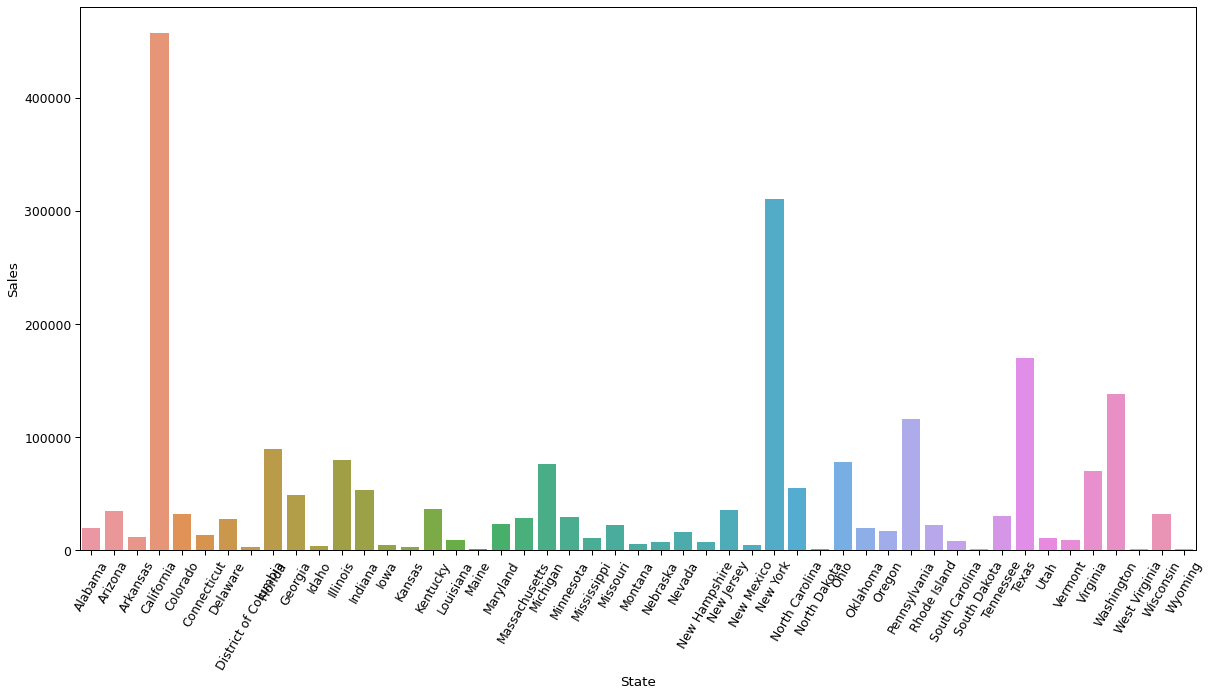

In [ ]:
f1= pd.DataFrame(data.groupby(['State']).Sales.sum())
f1.reset_index(inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(x='State',y='Sales',data=f1)
plt.xticks(rotation=60)
plt.show()

Sales are higher but still for some states profit mean is below zero so company should focus on that states.

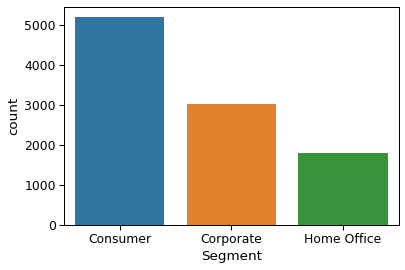

In [ ]:
sns.countplot(x='Segment',data=data)

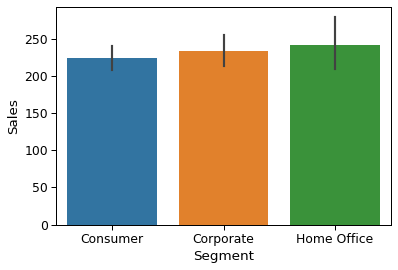

In [ ]:
sns.barplot(x='Segment',y='Sales',data=data)

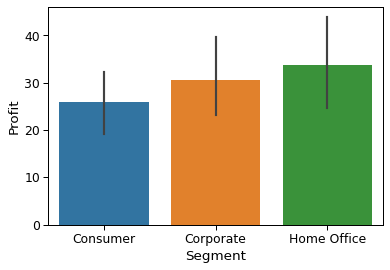

In [ ]:
sns.barplot(x='Segment',y='Profit',data=data)

In [ ]:
data1=pd.DataFrame(data.groupby(['Segment','Category']).Profit.mean())
data1.reset_index()
data1

Profit
Segment     Category                  
Consumer    Furniture         6.281293
            Office Supplies  18.014174
            Technology       74.445646
Corporate   Furniture        11.741201
            Office Supplies  22.102923
            Technology       79.723823
Home Office Furniture        10.705465
            Office Supplies  24.034439
            Technology       89.152458

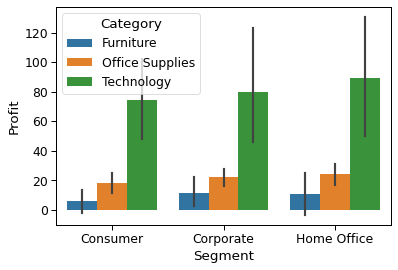

In [ ]:
sns.barplot(x='Segment',y='Profit',data=data,hue='Category')

Though we have more total no. of consumers in segment we still earn less profit from them so we should bring out more deals for them.
And also provide the deals to Home Office segment which gives out more profit.

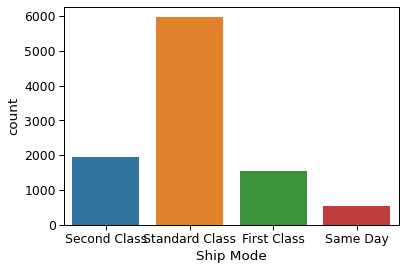

In [ ]:
sns.countplot(x='Ship Mode',data=data)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

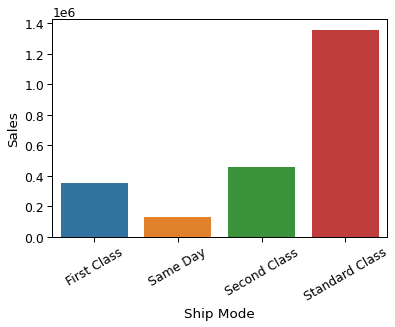

In [ ]:
data1=pd.DataFrame(data.groupby(['Ship Mode']).Sales.sum())
data1.reset_index(inplace=True)
sns.barplot(x='Ship Mode',y='Sales',data=data1)
plt.xticks(rotation=30)

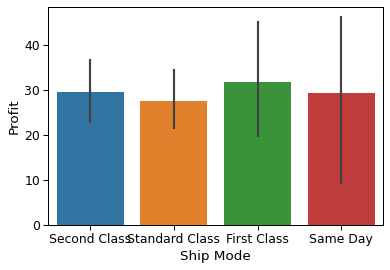

In [ ]:
sns.barplot(x='Ship Mode',y='Profit',data=data)

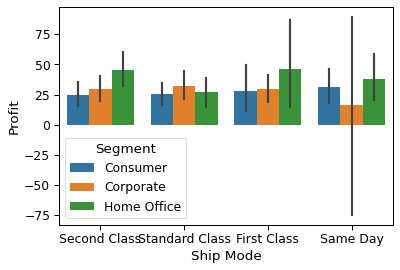

In [ ]:
sns.barplot(x='Ship Mode',y='Profit',data=data,hue='Segment')

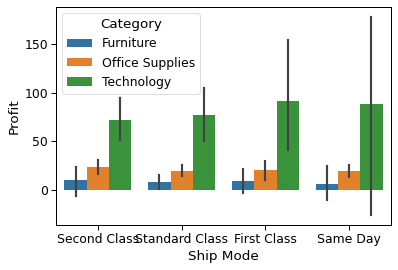

In [ ]:
sns.barplot(x='Ship Mode',y='Profit',data=data,hue='Category')


Standard Class is used most as Ship Mode but still the profit is much lower therfore company should focus that area as well.

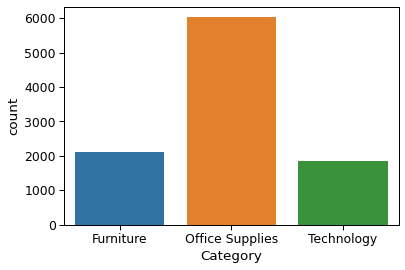

In [ ]:
sns.countplot(x='Category',data=data)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

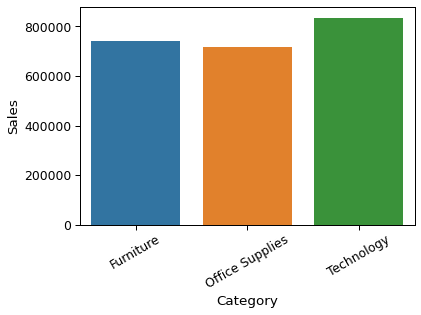

In [ ]:
data1=pd.DataFrame(data.groupby(['Category']).Sales.sum())
data1.reset_index(inplace=True)
sns.barplot(x='Category',y='Sales',data=data1)
plt.xticks(rotation=30)

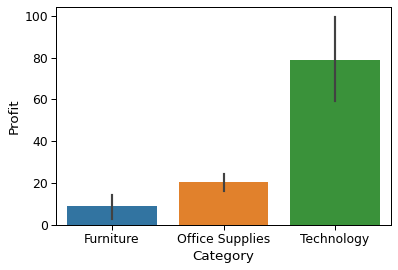

In [ ]:
sns.barplot(x='Category',y='Profit',data=data)

Sales of Office Supplies and Furniture both combined are more than Technology but most profit comes from Technology. So company should focus more on their sales.

In [ ]:
data[data['Category']=='Technology']['Sub-Category'].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

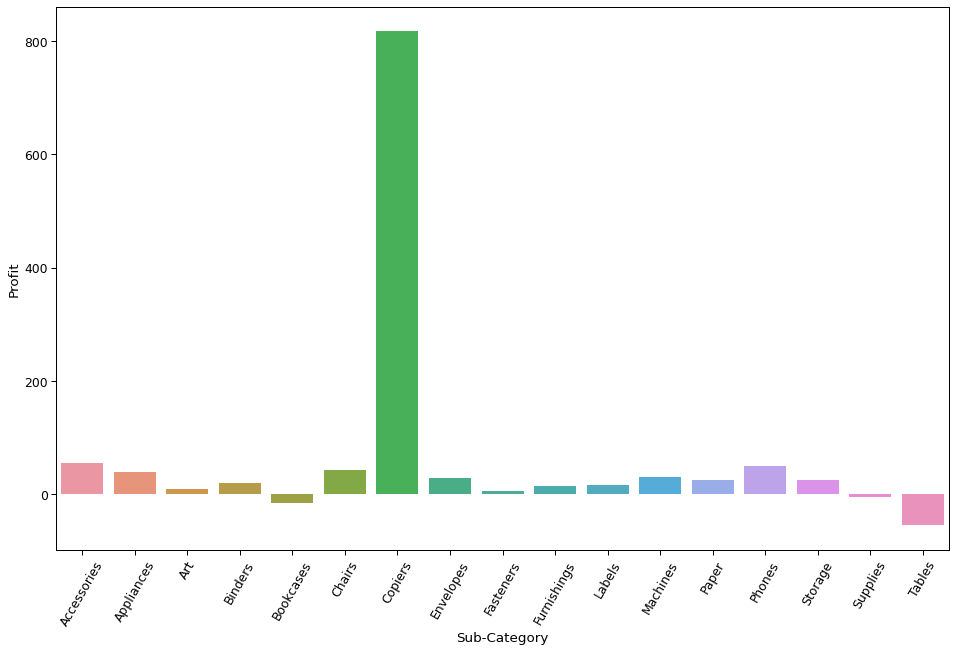

In [ ]:
f= pd.DataFrame(data.groupby(['Sub-Category']).Profit.mean())
f.reset_index(inplace=True)
plt.figure(figsize=(16,10))
sns.barplot(x='Sub-Category',y='Profit',data=f)
plt.xticks(rotation=60)
plt.show()

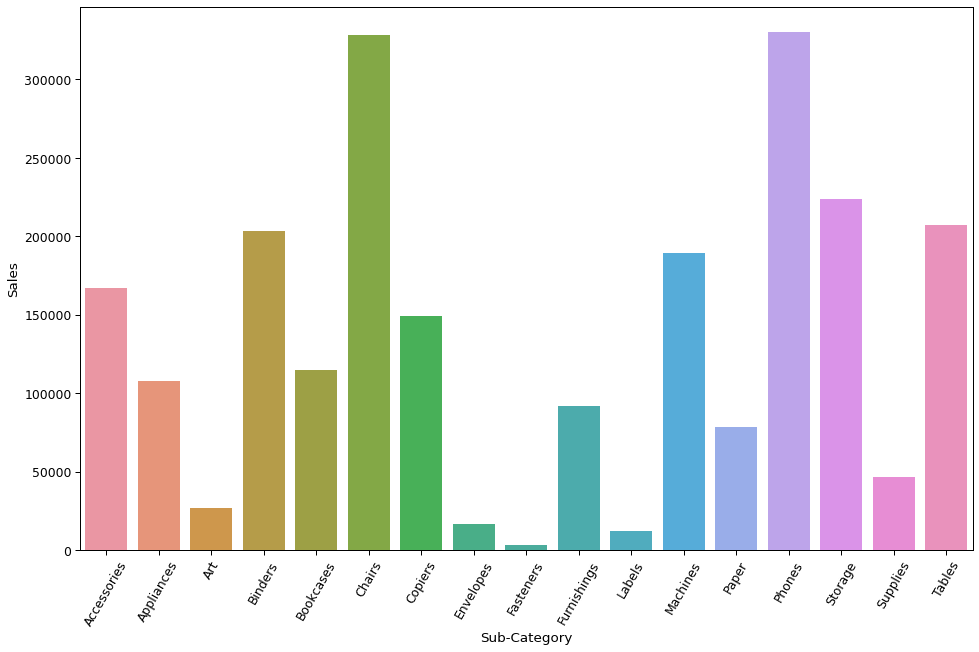

In [ ]:
f= pd.DataFrame(data.groupby(['Sub-Category']).Sales.sum())
f.reset_index(inplace=True)
plt.figure(figsize=(16,10))
sns.barplot(x='Sub-Category',y='Sales',data=f)
plt.xticks(rotation=60)
plt.show()

Also in all of Category and Sub-Category all the profit comes through only copiers. Therfore company should review what factors are leading to such scenarios or create a new policy for sales of all categories.